## This Jupyter notebook contains experimental data from realdata.csv file.

In [2]:
# Data is saved as realdata.csv from 600 min heat run test

In [4]:
using DataFrames
using CSV
using Plots
pyplot();
using LaTeXStrings;
df=CSV.read("realdata.csv")

,Temperaturmålinger fra Åbjøra.,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18
,Missing,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,missing,Tid,Ug,Pg,Qg,If,Spor-temp,Blikk-temp,W-luft temp,K-luft temp,K vann inn,K vann ut,It,Ug[pu],Pg[pu],Qg[pu],If[pu],It[pu]
4,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
5,missing,3/13/2017 4:00,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
6,missing,3/13/2017 4:01,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
7,missing,3/13/2017 4:02,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
8,missing,3/13/2017 4:03,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
9,missing,3/13/2017 4:04,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052


In [5]:
first(df,10)

,Temperaturmålinger fra Åbjøra.,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18
,Missing,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,missing,Tid,Ug,Pg,Qg,If,Spor-temp,Blikk-temp,W-luft temp,K-luft temp,K vann inn,K vann ut,It,Ug[pu],Pg[pu],Qg[pu],If[pu],It[pu]
4,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
5,missing,3/13/2017 4:00,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
6,missing,3/13/2017 4:01,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
7,missing,3/13/2017 4:02,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
8,missing,3/13/2017 4:03,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052
9,missing,3/13/2017 4:04,0.025781,0.111719,0.111717,0,28.291992,28.291992,24.213867,22.174805,16.057617,14.018555,3538.162408,0.002343727,0.00108465,0.001084631,0,0.654488052


In [6]:
df_pu_values = df[6:653, [:Column14, :Column15, :Column16,:Column17,:Column18 ]]
df_temperatures = df[6:653, [:Column7, :Column8, :Column10,:Column9,:Column11,:Column12 ]]
Vt_pu,Pg_pu,Qg_pu,If_pu,It_pu=df_pu_values[1],df_pu_values[2],df_pu_values[3],df_pu_values[4],df_pu_values[5]
Ts,TFe,Tac,Tah,Twc,Twh=df_temperatures[1],df_temperatures[2],df_temperatures[3],df_temperatures[4],df_temperatures[5],df_temperatures[6]

(Union{Missing, String}["28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992"  …  "68.818359", "68.818359", "68.818359", "68.818359", "68.818359", "68.818359", "68.818359", "68.818359", "68.818359", "68.818359"], Union{Missing, String}["28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992", "28.291992"  …  "60.339258", "60.339258", "60.339258", "60.339258", "60.339258", "60.339258", "60.339258", "60.339258", "60.339258", "60.339258"], Union{Missing, String}["22.174805", "22.174805", "22.174805", "22.174805", "22.174805", "22.174805", "22.174805", "22.174805", "22.174805", "22.174805"  …  "20.135742", "20.135742", "20.135742", "20.135742", "20.135742", "20.135742", "20.135742", "20.135742", "20.135742", "20.135742"], Union{Missing, String}["24.213867", "24.213867", "24.213867", "24.213867", "24.213867", "24.213867", "24.213867", "24.213867", "24.213867"

In [7]:
# All data are combination of string and missing so converting
# it back to float64
Vt_pu_float,Pg_pu_float,Qg_pu_float,If_pu_float,It_pu_float =zeros(648),zeros(648),zeros(648),zeros(648),zeros(648)
Ts_float,TFe_float,Tac_float,Tah_float,Twc_float,Twh_float = zeros(648),zeros(648),zeros(648),zeros(648),zeros(648),zeros(648)
for i in range(1,step=1,648)
    #
    Vt_pu_float[i]=parse(Float64, Vt_pu[i])
    Pg_pu_float[i]=parse(Float64, Pg_pu[i])
    Qg_pu_float[i]=parse(Float64, Qg_pu[i])
    If_pu_float[i]=parse(Float64, If_pu[i])
    It_pu_float[i]=parse(Float64, It_pu[i])
    #
    Ts_float[i]=parse(Float64, Ts[i])
    TFe_float[i]=parse(Float64, TFe[i])
    Tac_float[i]=parse(Float64, Tac[i])
    Tah_float[i]=parse(Float64, Tah[i])
    Twc_float[i]=parse(Float64, Twc[i])
    Twh_float[i]=parse(Float64, Twh[i])
end

t_sim=range(0,step=60,647*60)

0:60:38820

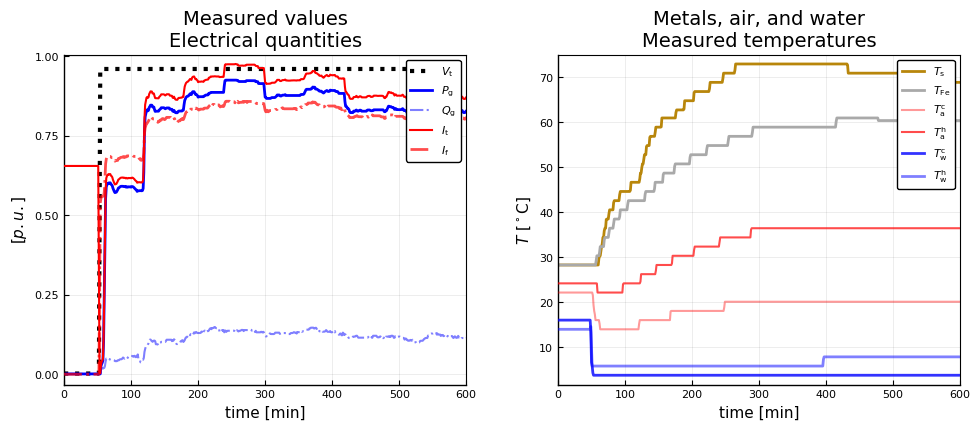

In [16]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter5/";
# Plotting the measured data
plot(t_sim/60,Vt_pu_float,label=L"V_\mathrm{t}",lc=:black,la=1,ls=:dot,lw=3)
plot!(t_sim/60,Pg_pu_float,label=L"P_\mathrm{g}",lc=:blue,la=1,lw=2)
plot!(t_sim/60,Qg_pu_float,label=L"Q_\mathrm{g}",lc=:blue,la=0.5,lw=1.5,ls=:dashdot)
plot!(t_sim/60,It_pu_float,label=L"I_\mathrm{t}",lc=:red,la=1,lw=1.5)
plot!(t_sim/60,If_pu_float,label=L"I_\mathrm{f}",lc=:red,la=0.7,lw=2,ls=:dashdot)
electrical_values_plot=plot!(title="Measured values\nElectrical quantities",xlabel="time [min]",
    ylabel=L"[p.u.]",xlim=(0,600),framestyle = :box,legend=:topright)
# Plotting the measured data
plot(t_sim/60,Ts_float,label=L"T_\mathrm{s}",lc=:darkgoldenrod,la=1,ls=:solid,lw=2)
plot!(t_sim/60,TFe_float,label=L"T_\mathrm{Fe}",lc=:darkgrey,la=1,lw=2)
plot!(t_sim/60,Tac_float,label=L"T_\mathrm{a}^\mathrm{c}",lc=:red,la=0.4,lw=1.5,ls=:solid)
plot!(t_sim/60,Tah_float,label=L"T_\mathrm{a}^\mathrm{h}",lc=:red,la=0.7,lw=1.5)
plot!(t_sim/60,Twc_float,label=L"T_\mathrm{w}^\mathrm{c}",lc=:blue,la=0.8,lw=2,ls=:solid)
plot!(t_sim/60,Twh_float,label=L"T_\mathrm{w}^\mathrm{h}",lc=:blue,la=0.5,lw=2,ls=:solid)
temp_values_plot=plot!(title="Metals, air, and water\nMeasured temperatures",xlabel="time [min]",
    ylabel=L"$T$ [${}^\circ$C]",xlim=(0,600),framestyle = :box,legend=:topright)

using Plots.PlotMeasures
measured_data=plot(electrical_values_plot, temp_values_plot,
        layout=grid(1,2),size = (1000, 450),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:topright)
figfile="Measurementdata.svg"
savefig(figpath*figfile)

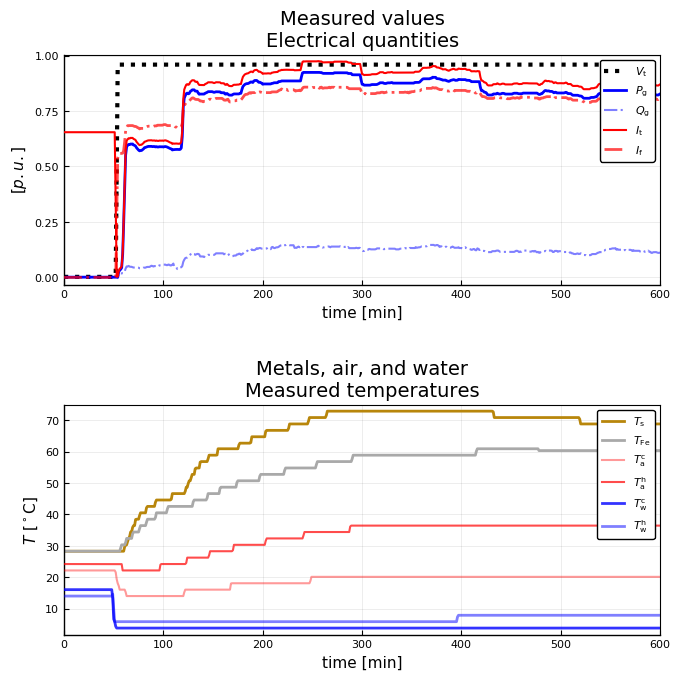

In [24]:
# Plotting for SIMS paper
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/SIMS paper/resources/Figures/Section3/";
using Plots.PlotMeasures
pyplot();
measured_data=plot(electrical_values_plot, temp_values_plot,
        layout=grid(2,1),size = (700, 700),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm,legend=:topright)
figfile="Measurementdata.svg"
savefig(figpath*figfile)